    Gamma-GMT - Фермент, участвующий в обмене аминокислот. Накапливается в основном в почках, печени и поджелудочной железе. При повышении уровня этого фермента следует сдать дополнительные анализы, так как это может говорить о большом количестве болезней, ведь GMT повышается у людей при болезнях печени, почек, поджелудочной и раке. 
    При помощи машинного обучения можно попытаться предсказать значение гамма-глутамилтранспептидазы (гамма-GTP) по смежным параметрам и таким факторам, как курение, прием алкоголя, которые могут сильно повлиять на его уровень. Результат  работы модели будет нести рекомендательный характер, что может дать людям понять, что стоит сдать дополнительные анализы.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [17]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [18]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [19]:
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})
df.loc[(df['gamma_GTP'] <= 60), 'gamma_GTP'] = 0
df.loc[(df['gamma_GTP'] > 60), 'gamma_GTP'] = 1
#df.loc[(df['gamma_GTP'] > 150), 'gamma_GTP'] = 2

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)

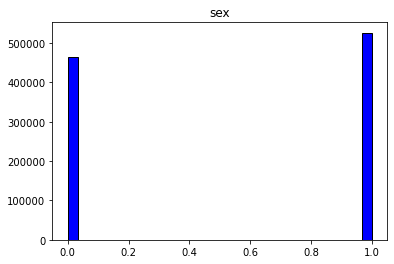

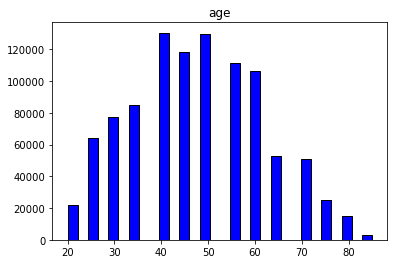

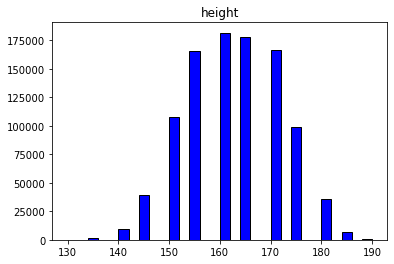

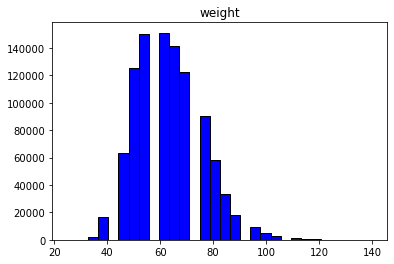

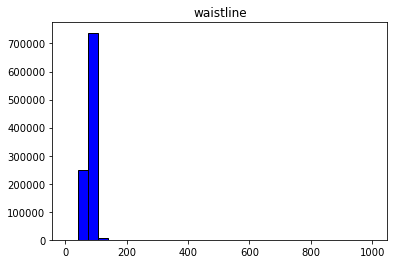

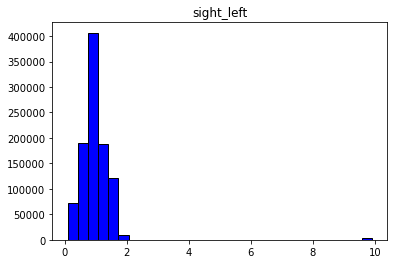

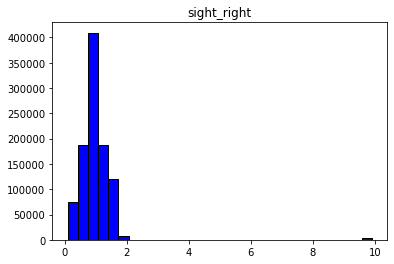

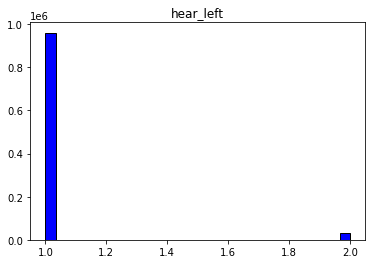

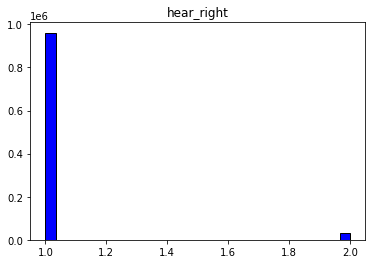

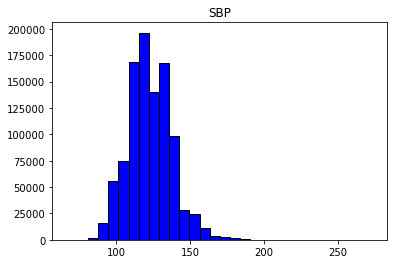

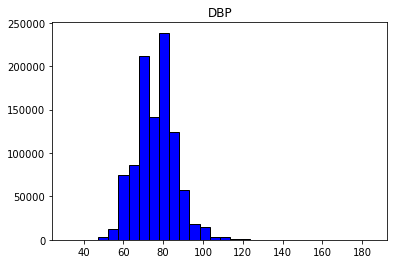

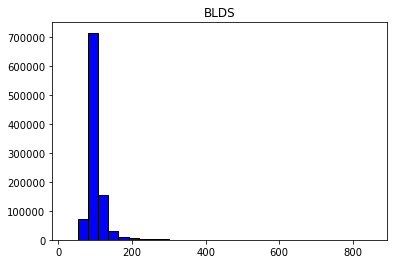

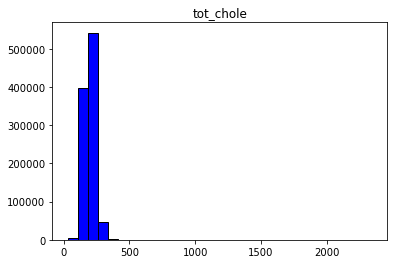

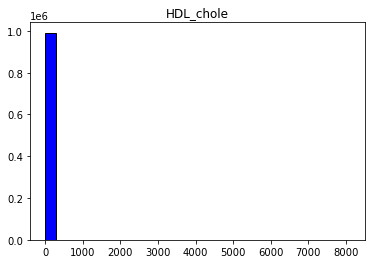

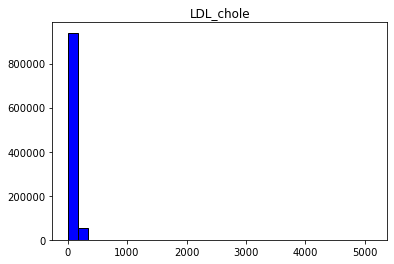

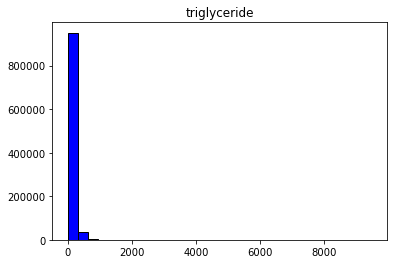

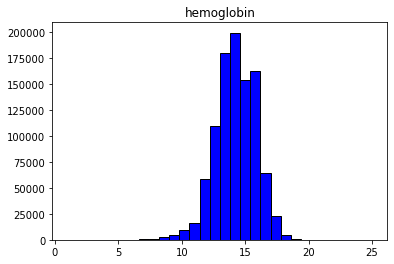

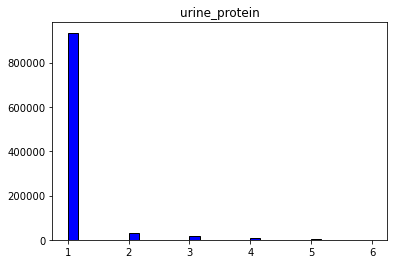

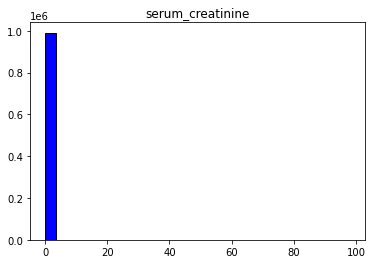

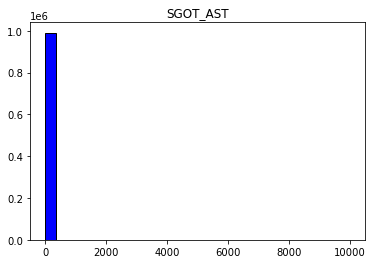

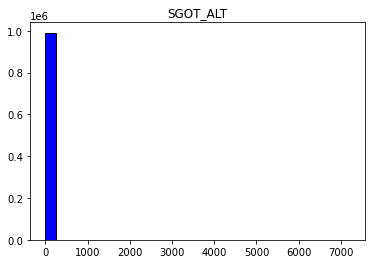

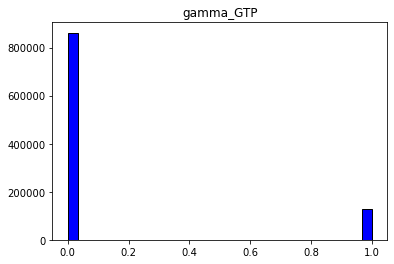

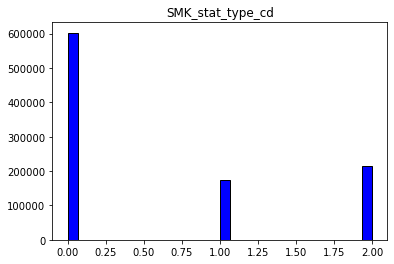

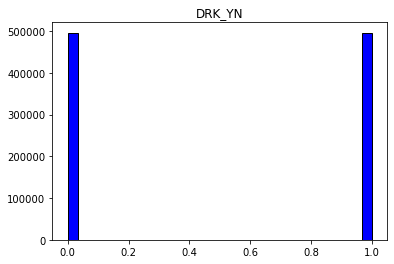

In [20]:
for i in df.columns:
        plt.hist(df[i], color = 'blue', edgecolor='black',bins=30)
        plt.title(i)
        plt.show()

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991346.0,0.531010,0.499038,0.0,0.0,1.0,1.0,1.0
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0


Удаляем плохие данные


In [22]:
possible_na = ['age', 'height', 'weight',  'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'SGOT_AST', 'SGOT_ALT']
for column in possible_na:
    df = df[np.abs(stats.zscore(df[column])) < 3]


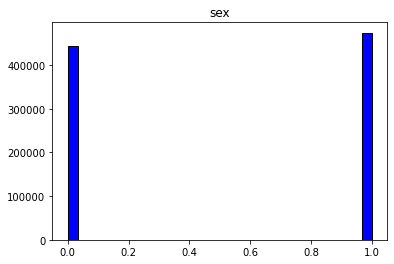

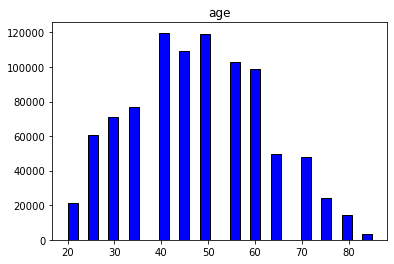

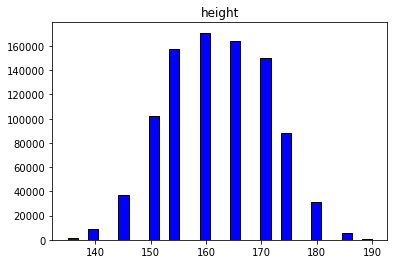

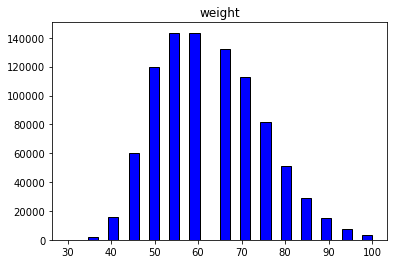

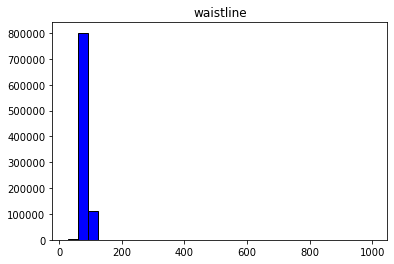

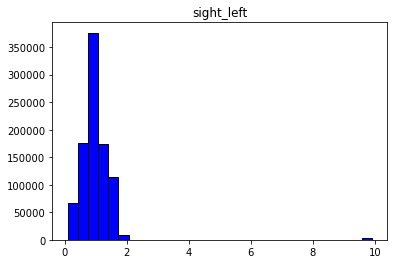

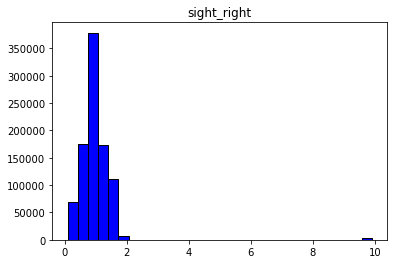

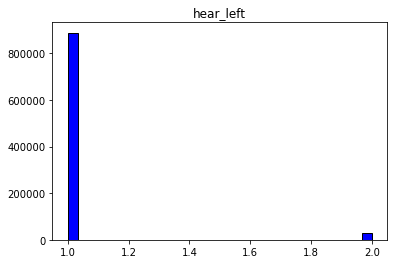

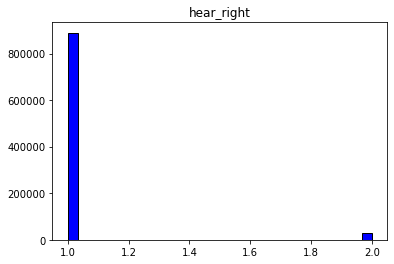

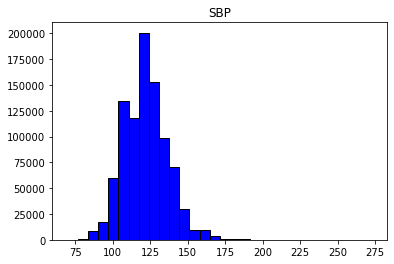

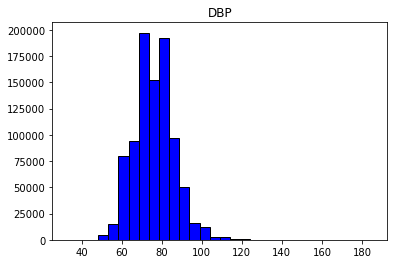

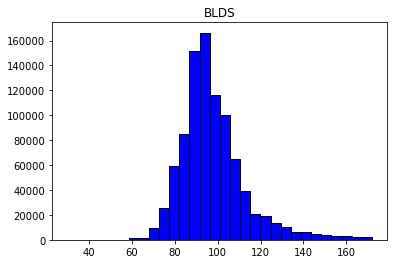

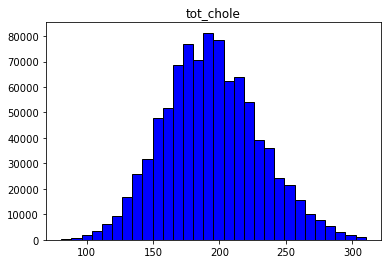

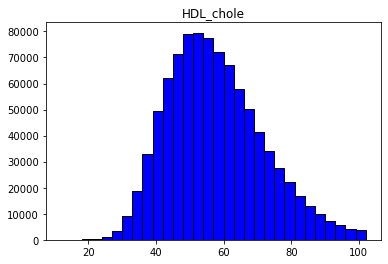

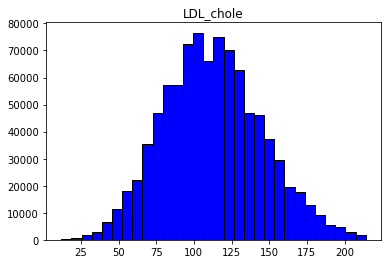

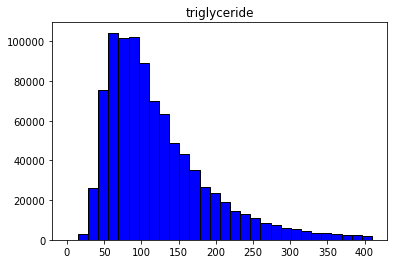

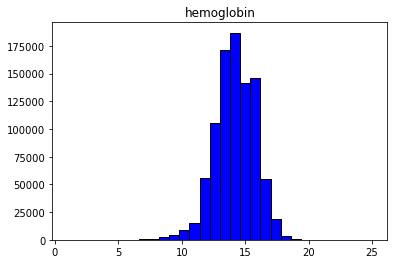

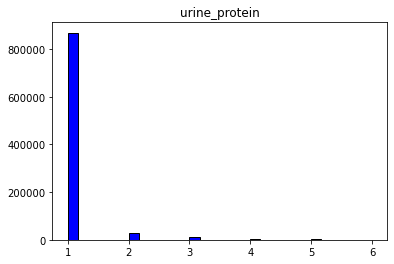

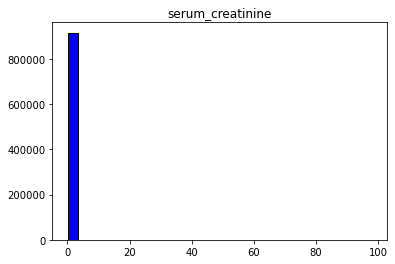

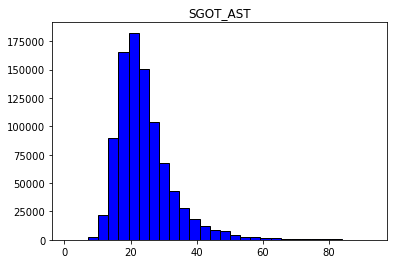

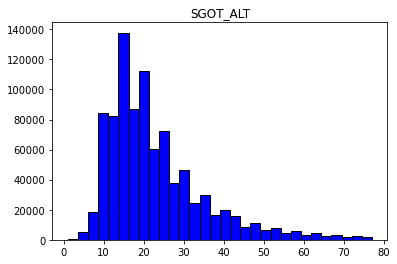

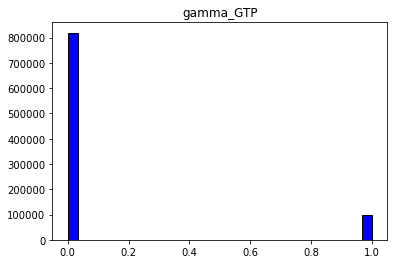

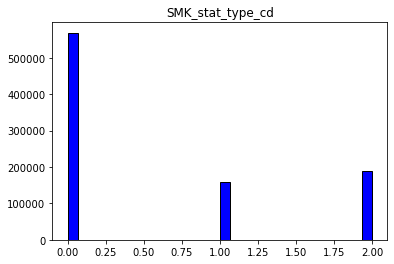

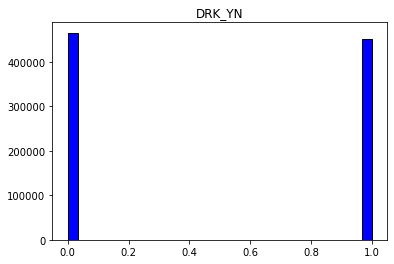

In [23]:
for i in df.columns:
        plt.hist(df[i], color = 'blue', edgecolor='black',bins=30)
        plt.title(i)
        plt.show()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,917386.0,0.517145,0.499706,0.0,0.0,1.0,1.0,1.0
age,917386.0,47.685053,14.262666,20.0,40.0,50.0,60.0,85.0
height,917386.0,162.026971,9.235862,135.0,155.0,160.0,170.0,190.0
weight,917386.0,62.646481,11.906021,30.0,55.0,60.0,70.0,100.0
waistline,917386.0,80.757151,11.520627,27.0,74.0,81.0,87.0,999.0
sight_left,917386.0,0.980333,0.602800,0.1,0.7,1.0,1.2,9.9
sight_right,917386.0,0.978226,0.604127,0.1,0.7,1.0,1.2,9.9
hear_left,917386.0,1.031690,0.175174,1.0,1.0,1.0,1.0,2.0
hear_right,917386.0,1.030629,0.172312,1.0,1.0,1.0,1.0,2.0
SBP,917386.0,122.030680,14.436901,70.0,111.0,120.0,130.0,273.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917386 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               917386 non-null  int64  
 1   age               917386 non-null  int64  
 2   height            917386 non-null  int64  
 3   weight            917386 non-null  int64  
 4   waistline         917386 non-null  float64
 5   sight_left        917386 non-null  float64
 6   sight_right       917386 non-null  float64
 7   hear_left         917386 non-null  float64
 8   hear_right        917386 non-null  float64
 9   SBP               917386 non-null  float64
 10  DBP               917386 non-null  float64
 11  BLDS              917386 non-null  float64
 12  tot_chole         917386 non-null  float64
 13  HDL_chole         917386 non-null  float64
 14  LDL_chole         917386 non-null  float64
 15  triglyceride      917386 non-null  float64
 16  hemoglobin        91

In [26]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [27]:
df['DRK_YN'].value_counts()

0    465796
1    451590
Name: DRK_YN, dtype: int64

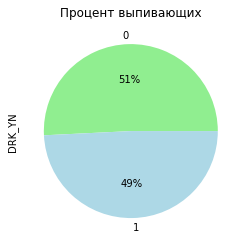

In [28]:
df['DRK_YN'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['lightgreen', 'lightblue'])
plt.title('Процент выпивающих')
plt.show()

In [29]:
df['sex'].value_counts()

1    474422
0    442964
Name: sex, dtype: int64

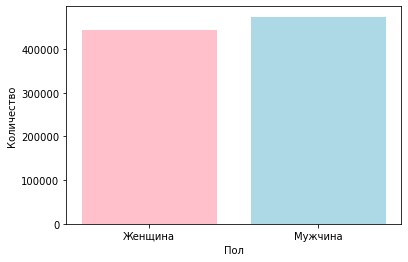

In [30]:
sex = df['sex'].value_counts()
plt.xlabel('Пол')
plt.xticks([0,1],['Женщина','Мужчина'])
plt.ylabel('Количество')
plt.bar(x=sex.index, height=sex.values,color=['lightblue','pink'])
plt.show()

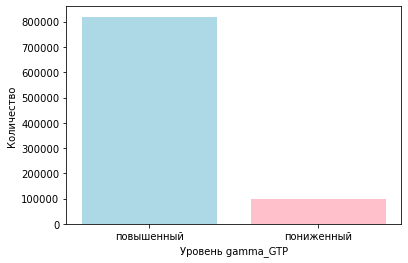

In [31]:
sex = df['gamma_GTP'].value_counts()
plt.xlabel('Уровень gamma_GTP')
plt.xticks([0,1],['повышенный','пониженный'])
plt.ylabel('Количество')
plt.bar(x=sex.index, height=sex.values,color=['lightblue','pink'])
plt.show()

In [32]:
df['age'].unique()

array([35, 30, 40, 50, 45, 55, 65, 25, 60, 20, 70, 75, 80, 85],
      dtype=int64)

In [33]:
df['age'].value_counts()

40    119794
50    119059
45    109160
55    102635
60     98609
35     76760
30     71014
25     60419
65     49572
70     47840
75     24027
20     21142
80     14258
85      3097
Name: age, dtype: int64

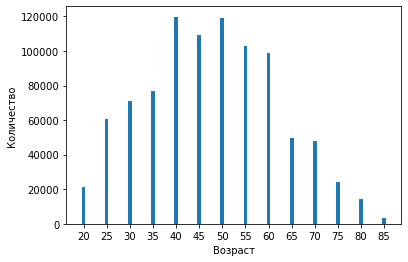

In [34]:
age = df['age'].value_counts()
plt.xlabel('Возраст')
plt.xticks(df['age'].unique())
plt.ylabel('Количество')
plt.bar(x=age.index, height=age.values)
plt.show()

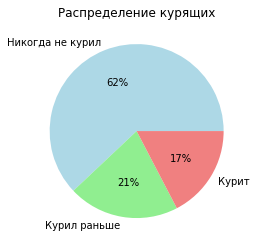

In [35]:
labels = ['Никогда не курил', 'Курил раньше', 'Курит']
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.pie(df['SMK_stat_type_cd'].value_counts(), labels = labels, autopct='%.0f%%', colors=colors)
plt.title('Распределение курящих')
plt.show()

In [36]:
df = df.drop_duplicates()
# удалило 24 дубликата

In [37]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

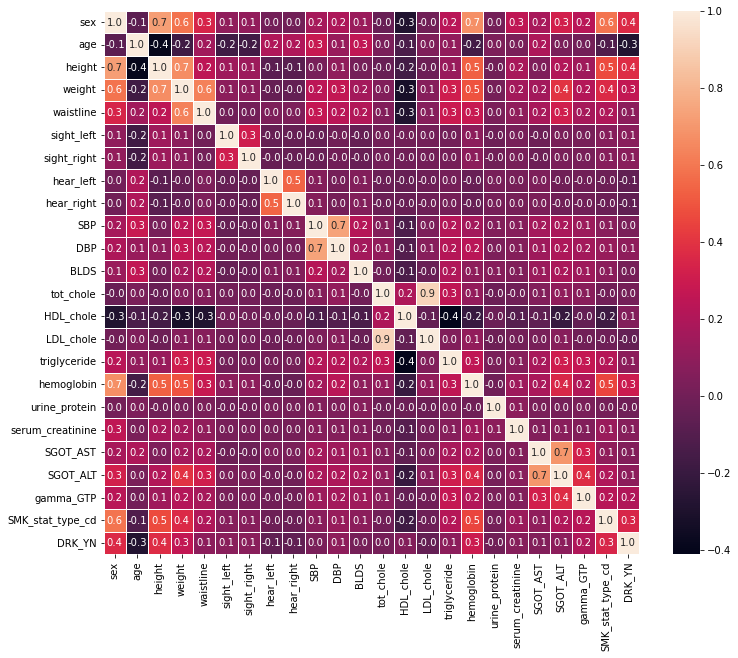

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
snsplot = sns.heatmap(df.corr(), annot=True,linewidths=0.5, fmt='.1f')
plt.show()

<AxesSubplot:ylabel='Density'>

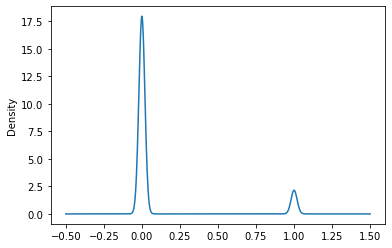

In [251]:
df['gamma_GTP'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

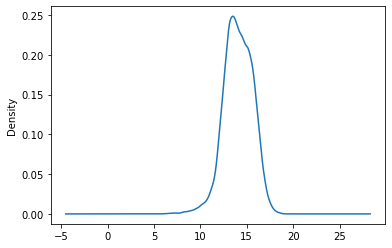

In [152]:
df['hemoglobin'].plot(kind='kde')


In [39]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [40]:
new_df_GTP = df.loc[:, ['hemoglobin', 'SMK_stat_type_cd','triglyceride','SGOT_AST', 'SGOT_ALT', 'DRK_YN']]
new_df_GTP.head(10)

,hemoglobin,SMK_stat_type_cd,triglyceride,SGOT_AST,SGOT_ALT,DRK_YN
0,17.1,0,92.0,21.0,35.0,1
1,15.8,2,121.0,20.0,36.0,0
2,15.8,0,104.0,47.0,32.0,0
3,17.6,0,106.0,29.0,34.0,0
4,13.8,0,104.0,19.0,12.0,0
5,13.8,2,232.0,29.0,40.0,1
6,12.3,0,75.0,19.0,12.0,0
7,14.4,2,101.0,18.0,18.0,1
8,15.1,0,100.0,32.0,23.0,1
9,13.9,1,83.0,21.0,38.0,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
from sklearn import tree

In [42]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)

In [43]:
y = df['gamma_GTP']
x = new_df_GTP

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Дерево

In [45]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Decision Tree Classifier
Accuracy: 0.8495800472004055
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    163803
         1.0       0.32      0.34      0.33     19670

    accuracy                           0.85    183473
   macro avg       0.62      0.63      0.62    183473
weighted avg       0.86      0.85      0.85    183473

Confusion Matrix:
[[149114  14689]
 [ 12909   6761]]


In [46]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3],
    'min_samples_split':[3,4,5]
}

tree_model = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}
Best Cross-Validation Score: 0.896803617204726


In [47]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=3)
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)

acc_tree = accuracy_score(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Decision Tree Classifier
Accuracy: 0.8964752306878941
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    163803
         1.0       0.54      0.26      0.35     19670

    accuracy                           0.90    183473
   macro avg       0.73      0.61      0.64    183473
weighted avg       0.88      0.90      0.88    183473

Confusion Matrix:
[[159450   4353]
 [ 14641   5029]]


## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier


In [49]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(x_train_scaled,y_train)
y_pred = KNN.predict(x_test_scaled)

print("Decision KNN Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Decision KNN Classifier
Accuracy: 0.8916788846315261
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    163803
         1.0       0.49      0.28      0.36     19670

    accuracy                           0.89    183473
   macro avg       0.70      0.62      0.65    183473
weighted avg       0.87      0.89      0.88    183473

Confusion Matrix:
[[158070   5733]
 [ 14141   5529]]


In [50]:
param_grid = {
    'n_neighbors': [6,10,14]
}

KNN_model = KNeighborsClassifier()
grid_search = GridSearchCV(KNN_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 14}
Best Cross-Validation Score: 0.9005766516562925


In [51]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN = KNN.fit(x_train_scaled,y_train)
y_pred = KNN.predict(x_test_scaled)

acc_KNN = accuracy_score(y_test, y_pred)

print("Decision KNN Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Decision KNN Classifier
Accuracy: 0.9008082933183629
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95    163803
         1.0       0.60      0.23      0.33     19670

    accuracy                           0.90    183473
   macro avg       0.76      0.60      0.64    183473
weighted avg       0.88      0.90      0.88    183473

Confusion Matrix:
[[160820   2983]
 [ 15216   4454]]


# Naive bayes

In [52]:
from sklearn.naive_bayes import GaussianNB


In [53]:
GNB = GaussianNB()
GNB = GNB.fit(x_train_scaled,y_train)
y_pred = GNB.predict(x_test_scaled)

acc_Gaus = accuracy_score(y_test, y_pred)

print("Decision Gaussian Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Decision Gaussian Classifier
Accuracy: 0.8752241474222365
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    163803
         1.0       0.43      0.51      0.47     19670

    accuracy                           0.88    183473
   macro avg       0.69      0.71      0.70    183473
weighted avg       0.89      0.88      0.88    183473

Confusion Matrix:
[[150582  13221]
 [  9672   9998]]


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

gbc.fit(x_train_scaled, y_train)
 

y_pred = gbc.predict(x_test_scaled)
 
# accuracy
acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Gradient Boosting Classifier
Accuracy: 0.9028412899990734
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    163803
         1.0       0.61      0.26      0.37     19670

    accuracy                           0.90    183473
   macro avg       0.76      0.62      0.66    183473
weighted avg       0.88      0.90      0.88    183473

Confusion Matrix:
[[160522   3281]
 [ 14545   5125]]


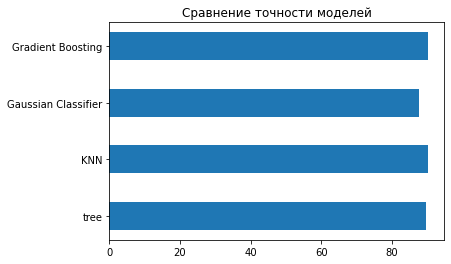

In [57]:
x=['tree', 'KNN', 'Gaussian Classifier', 'Gradient Boosting']
 

y=[float(acc_tree)*100,float(acc_KNN)*100,float(acc_Gaus)*100,float(acc) * 100]
   
plt.barh(x, y, height = 0.5)
 

plt.title("Сравнение точности моделей")
plt.show()

In [59]:
print(f'Точность tree: {float(acc_tree)}')
print(f'Точность KNN: {float(acc_KNN)}')
print(f'Точность Gaus: {float(acc_Gaus)}')
print(f'Точность Gradient Boosting: {float(acc)}')

Точность tree: 0.8964752306878941
Точность KNN: 0.9008082933183629
Точность Gaus: 0.8752241474222365
Точность Gradient Boosting: 0.9028412899990734
